# HR Analytics: Job Change of Data Scientists
- https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists
### data set
- train set = 'hr_data/aug_train.csv'
- test set = 'hr_data/aug_test.csv'
- test set output = 'hr_data/sample_submission.csv'
## Features
- enrollee_id : 후보자 고유 ID
- city: 도시 코드
- city_ development _index : 도시 개발  지수(scaled)
- gender: 후보자의 성별
- relevent_experience: 후보자의 관련 경험
- enrolled_university: 등록 된 대학 과정 유형 (있는 경우)
- education_level: 지원자의 교육 수준
- major_discipline : 후보자 교육 전공
- experience: 경력(년)
- company_size: 현재 고용주 회사의 직원 수
- company_type : 현재 고용주의 유형
- lastnewjob: 이전 직장과 현재 직장 간의 연도 차이
- training_hours: 완료된 교육 시간
- target:  0 – 전직을 찾고 있지 않음, 1 – 전직을 찾고

### **학력**
- Phd : 박사
- masters : 석사
- graduate : 학사
- high school : 고등
- primary school : 초등

### **회사 분류**
- pvt ltd : 주식 시장에 상장되지 않은 비공개 회사
- NGO : 비정부 기구

# EDM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams["font.size"] = 15
mpl.rcParams['font.family'] = 'malgun gothic'

mpl.rcParams['axes.unicode_minus'] = False

mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 15

In [2]:
train = pd.read_csv('hr_data/processing_company_size_4.8.2.csv')
train.shape

(19158, 15)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  float64
 6   education_level         19158 non-null  float64
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  float64
 9   company_size            19158 non-null  float64
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  new_comer               19158 non-null

In [4]:
education_level = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
for i, v in enumerate(education_level):
    train.loc[train['education_level']==i, 'education_level'] = v

In [5]:
train.describe()

,enrollee_id,city_development_index,enrolled_university,experience,company_size,last_new_job,training_hours,target,new_comer
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,0.471500,10.103299,3.145840,1.978964,65.366896,0.249348,0.056165
std,9616.292592,0.123362,0.810549,6.781532,2.158763,1.674582,60.058462,0.432647,0.230245
min,1.000000,0.448000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8554.250000,0.740000,0.000000,4.000000,2.000000,1.000000,23.000000,0.000000,0.000000
50%,16982.500000,0.903000,0.000000,9.000000,3.000000,1.000000,47.000000,0.000000,0.000000
75%,25169.750000,0.920000,1.000000,16.000000,5.000000,3.000000,88.000000,0.000000,0.000000
max,33380.000000,0.949000,2.000000,21.000000,7.000000,5.000000,336.000000,1.000000,1.000000


In [6]:
train.describe(include='object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,19158,3,Male,17729
relevent_experience,19158,2,Has relevent experience,13792
education_level,19158,5,Graduate,11818
major_discipline,19158,6,STEM,17305
company_type,19158,7,Pvt Ltd,9817


# 컬럼별 결측치 처리
- **null**값이 500 이하인 KNN
- **gender** : 결측치를 최빈값에 합친다.
- **major_discipline** : 결측치를 최빈값에 합친다.
- **company_size . type** : unkown이라는 새로운 value에 정의

# **시각화 분석**

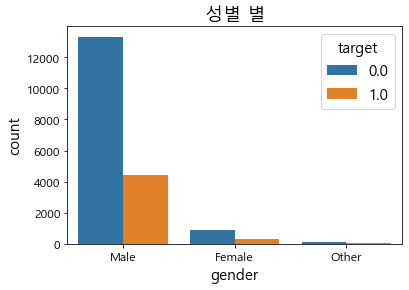

In [7]:
sns.countplot(x='gender', hue='target', data=train)
plt.title('성별 별')
plt.show()

# 도시 정보별 시각화

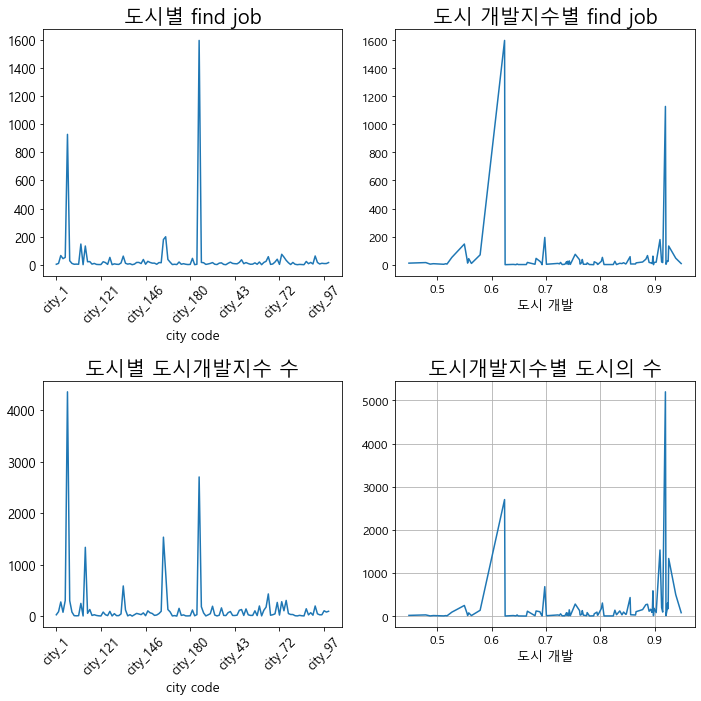

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

train.groupby('city')['target'].sum().plot(ax=axes[0, 0],fontsize=13, rot=45)
axes[0, 0].set_title('도시별 find job', fontdict=dict(fontsize=20))
axes[0, 0].set_xlabel('city code', fontsize=13)

train.groupby('city_development_index')['target'].sum().plot(ax=axes[0, 1])
axes[0, 1].set_title('도시 개발지수별 find job', fontdict=dict(fontsize=20))
axes[0, 1].set_xlabel('도시 개발', fontsize=13)

train.groupby('city')['city_development_index'].count().plot(ax=axes[1,0],fontsize=13, rot=45)
axes[1,0].set_title('도시별 도시개발지수 수', fontdict=dict(fontsize=20))
axes[1,0].set_xlabel('city code', fontsize=13)

train.groupby('city_development_index')['city'].count().plot(ax=axes[1,1])
axes[1,1].set_title('도시개발지수별 도시의 수', fontdict=dict(fontsize=20))
axes[1,1].set_xlabel('도시 개발', fontsize=13)

plt.tight_layout()
plt.grid(True)
plt.show()

In [9]:
# pd.DataFrame(train.groupby(['city_development_index', 'city'])['target'].sum()).to_csv('hr_data/asd.csv')

In [10]:
# train.pivot_table(values='target', 
#                   index=['city','city_development_index'], 
#                   aggfunc='mean').sort_values(by='target', ascending=False).to_csv('hr_data/asd.csv')

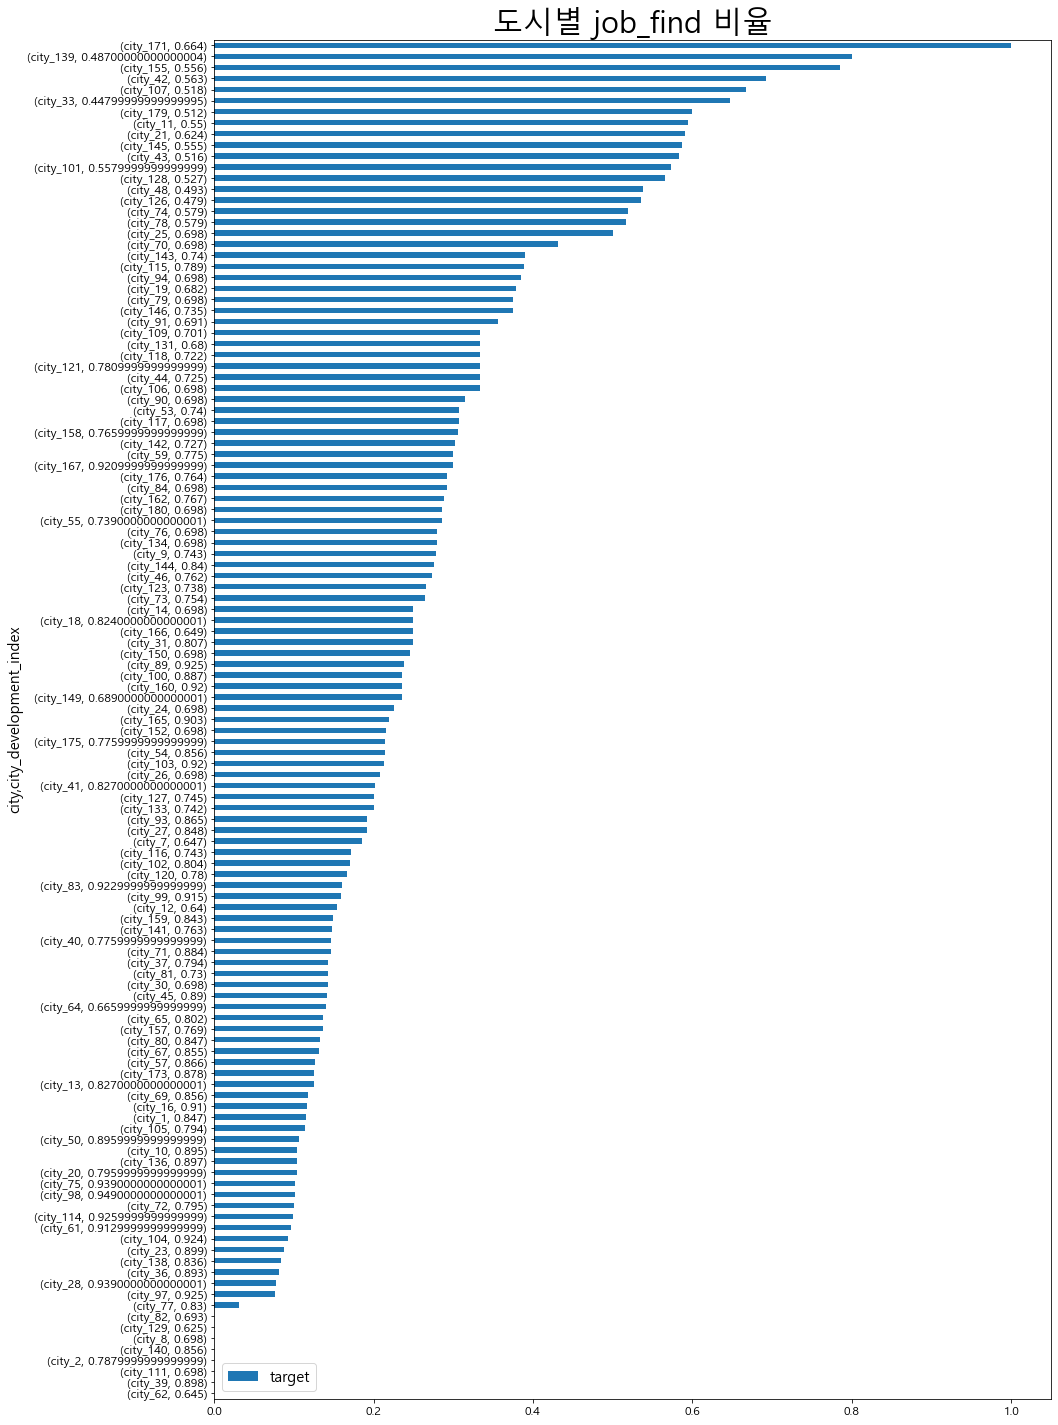

In [11]:
train.pivot_table(values='target', 
                  index=['city','city_development_index'], 
                  aggfunc='mean').sort_values(by='target').plot.barh(figsize=(15, 25))
plt.title('도시별 job_find 비율', fontsize=30)
plt.show()

## 학력, 전공, 대학 과정, 직무 관련 경험에 따른 이직 생각 시각화

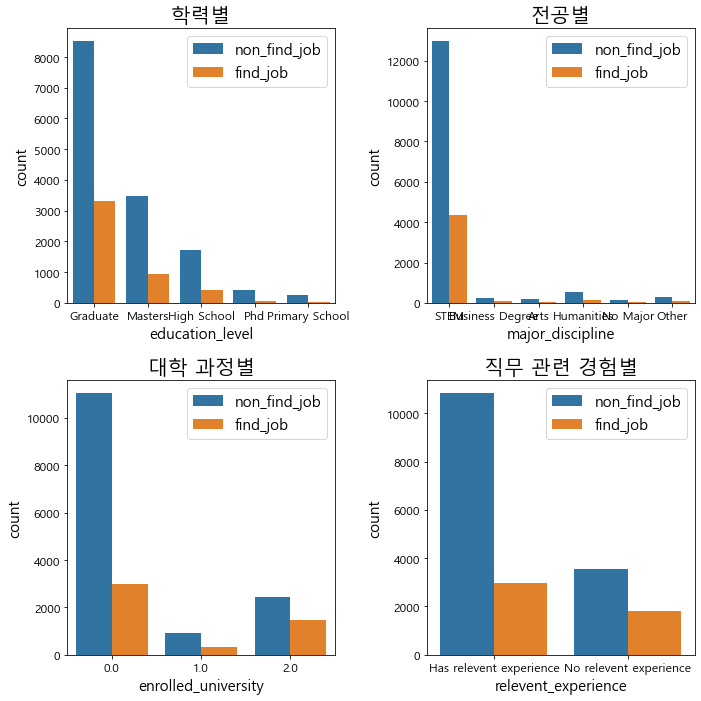

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.countplot(x='education_level', hue='target', data=train, ax=axes[0, 0])
sns.countplot(x='major_discipline', hue='target', data=train, ax=axes[0,1])
sns.countplot(x='enrolled_university', hue='target', data=train, ax=axes[1,0])
sns.countplot(x='relevent_experience', hue='target', data=train, ax=axes[1, 1])

axes[0,0].set_title('학력별', fontsize=20)
axes[0,0].set_xlabel('education_level', fontsize=15)
axes[0,0].legend(['non_find_job', 'find_job'])

axes[0,1].set_title('전공별', fontsize=20)
axes[0,1].set_xlabel('major_discipline', fontsize=15)
axes[0,1].legend(['non_find_job', 'find_job'])

axes[1,0].set_title('대학 과정별', fontsize=20)
axes[1,0].set_xlabel('enrolled_university', fontsize=15)
axes[1,0].legend(['non_find_job', 'find_job'])

axes[1,1].set_title('직무 관련 경험별', fontsize=20)
axes[1,1].set_xlabel('relevent_experience', fontsize=15)
axes[1,1].legend(['non_find_job', 'find_job'])

plt.tight_layout()
plt.show()

In [13]:
education_level

['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']

In [14]:
# train.pivot_table(values='target', index=['education_level', 'major_discipline'], 
#                   aggfunc='mean').plot.pie(subplots=True, figsize=(12, 12), autopct='%.2f%%',
#                                           explode=[0.1,0,0.1,0,0,0,0,0.1], shadow=True)
# plt.title('학력, 전공별 find job', fontsize=20)

# plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1.3))
# plt.tight_layout()
# plt.show()

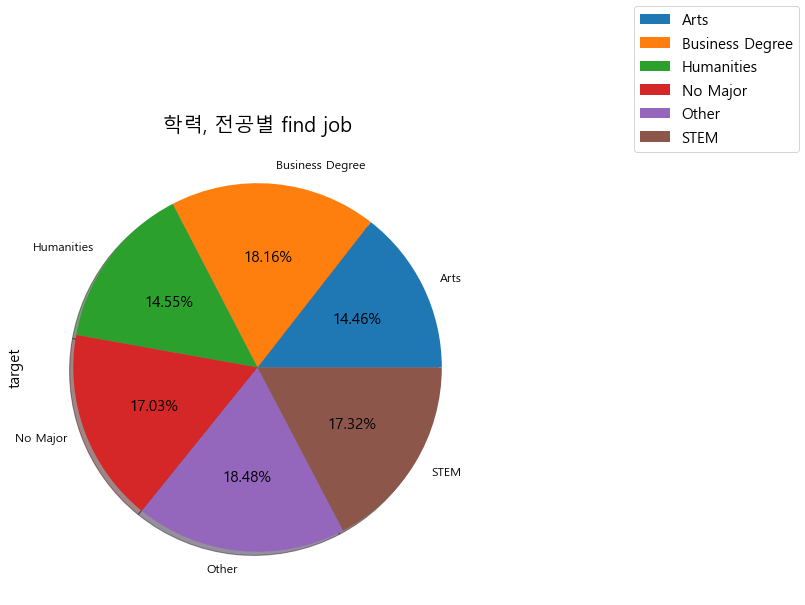

In [15]:
train.pivot_table(values='target', index=['major_discipline'], 
                  aggfunc='mean').plot.pie(subplots=True, figsize=(12, 12), autopct='%.2f%%', shadow=True, normalize=True)
plt.title('학력, 전공별 find job', fontsize=20)

plt.legend(loc='upper left', bbox_to_anchor=(1.3, 1.3))
plt.tight_layout()
plt.show()

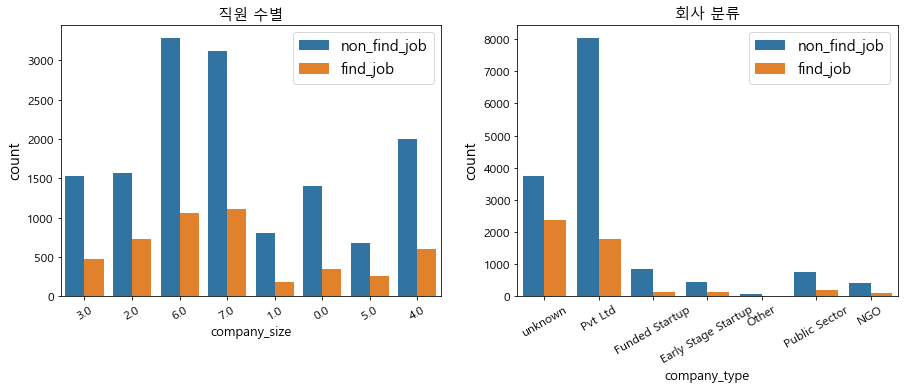

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

company_size_labels = train['company_size'].unique()
sns.countplot(x='company_size', hue='target', data=train, ax=axes[0])
axes[0].set_title('직원 수별', fontsize=15)
axes[0].set_xticklabels(company_size_labels, rotation=30, fontdict=dict(fontsize=12))
axes[0].set_xlabel('company_size', fontsize=13)
axes[0].legend(['non_find_job', 'find_job'])

company_type_labels = train['company_type'].unique()
sns.countplot(x='company_type', hue='target', data=train, ax=axes[1])
axes[1].set_title('회사 분류', fontsize=15)
axes[1].set_xticklabels(company_type_labels, rotation=30, fontdict=dict(fontsize=12))
axes[1].set_xlabel('company_type', fontsize=13)
axes[1].legend(['non_find_job', 'find_job'])

plt.show()

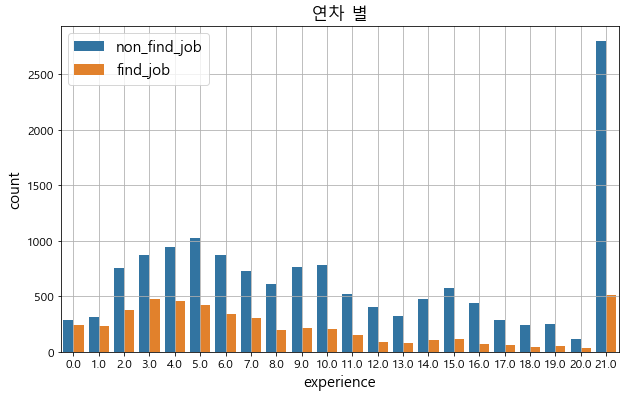

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='experience', hue='target', data=train)
plt.title('연차 별', fontsize=17)

plt.grid(True)
plt.legend(['non_find_job', 'find_job'])
plt.show()

In [18]:
# train.pivot_table(values='target', 
#                   index=['company_size','experience'], 
#                   aggfunc='mean').sort_values(by=['company_size', 'target'], ascending=False).to_csv('hr_data/asd.csv')

In [19]:
train['company_size'].value_counts()

2.0    4341
3.0    4224
7.0    2603
1.0    2297
0.0    2003
5.0    1754
4.0     995
6.0     941
Name: company_size, dtype: int64

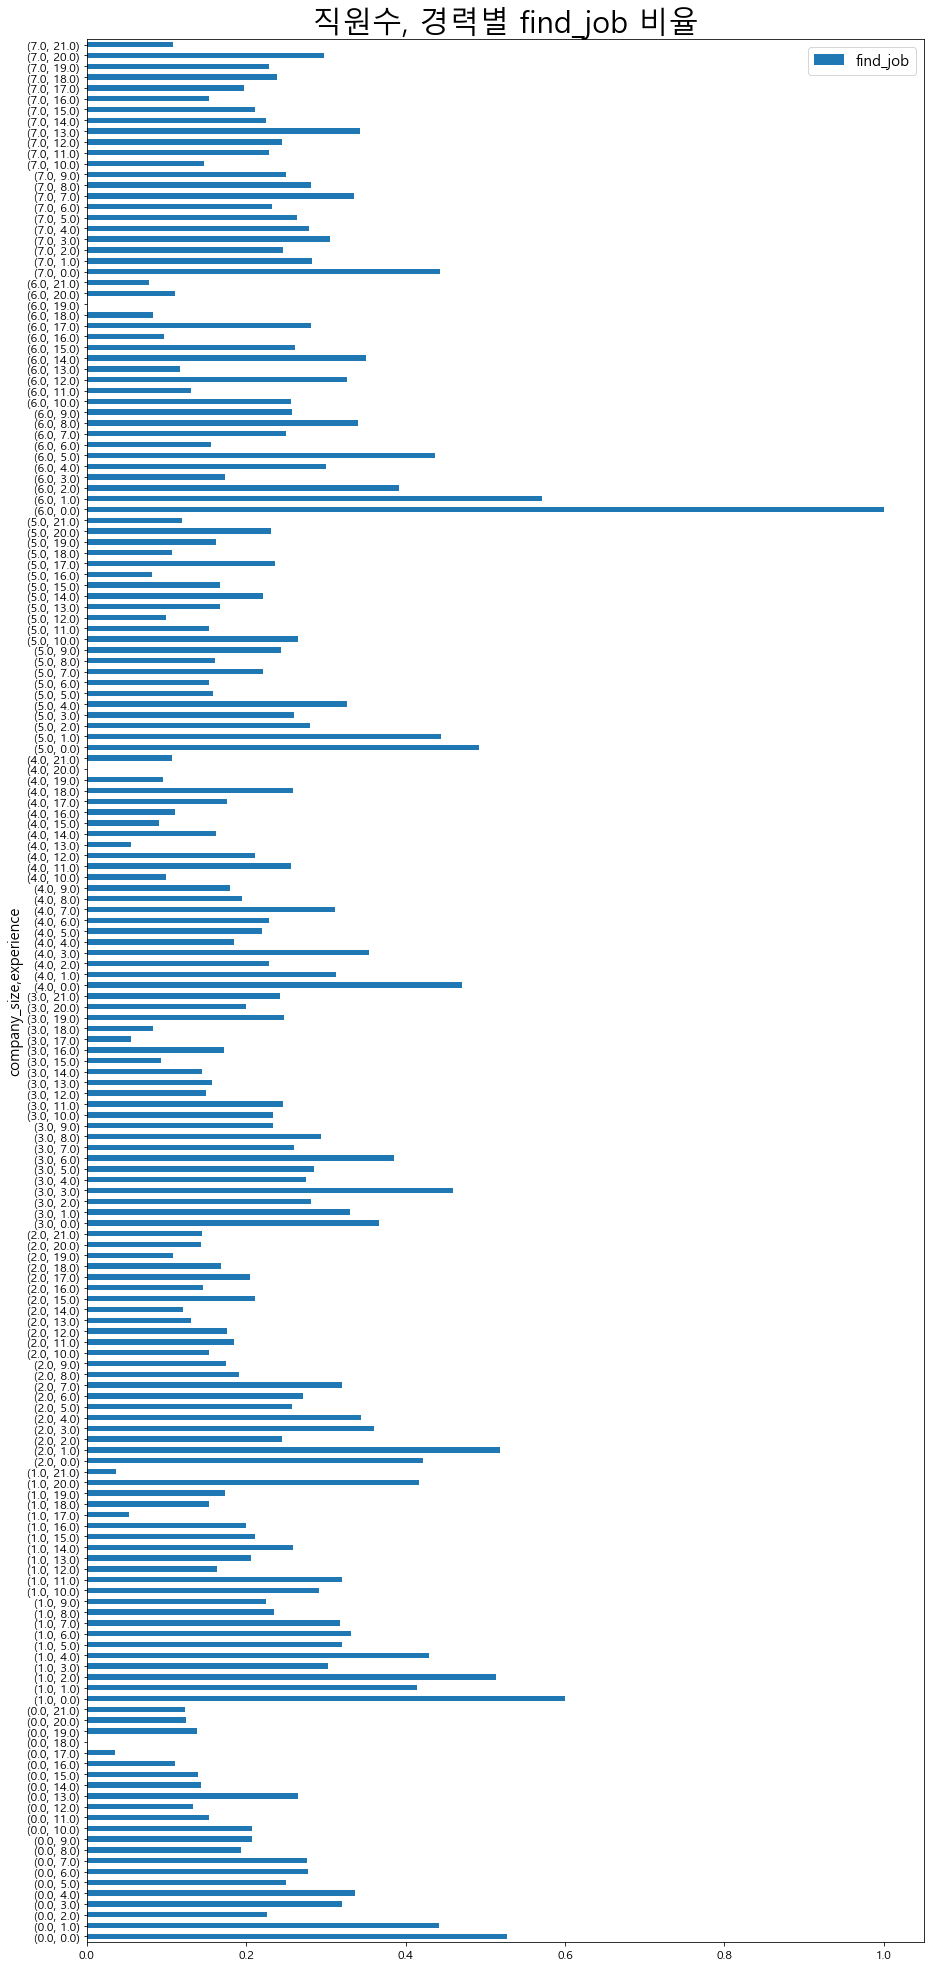

In [20]:
train.pivot_table(values='target', 
                  index=['company_size','experience'], 
                  aggfunc='mean').plot.barh(figsize=(15,35))#.sort_values(by='target').plot()
plt.title('직원수, 경력별 find_job 비율', fontsize=30)

plt.legend(['find_job'])
plt.show()

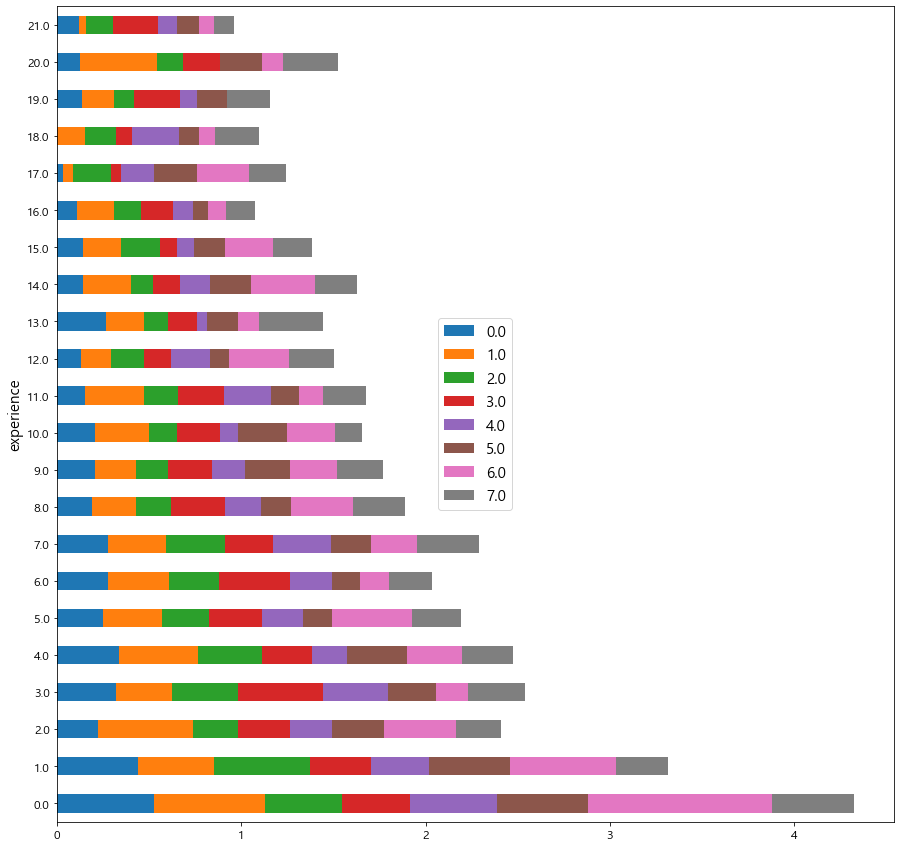

In [21]:
train.pivot_table(values='target', index='experience', 
                  columns='company_size', aggfunc='mean').plot.barh(figsize=(15, 15), stacked=True)

plt.legend(loc='center')
plt.show()

## 위 그래프에서 `<10`(회색), `500-999`(갈색), `100-500`(주황색)

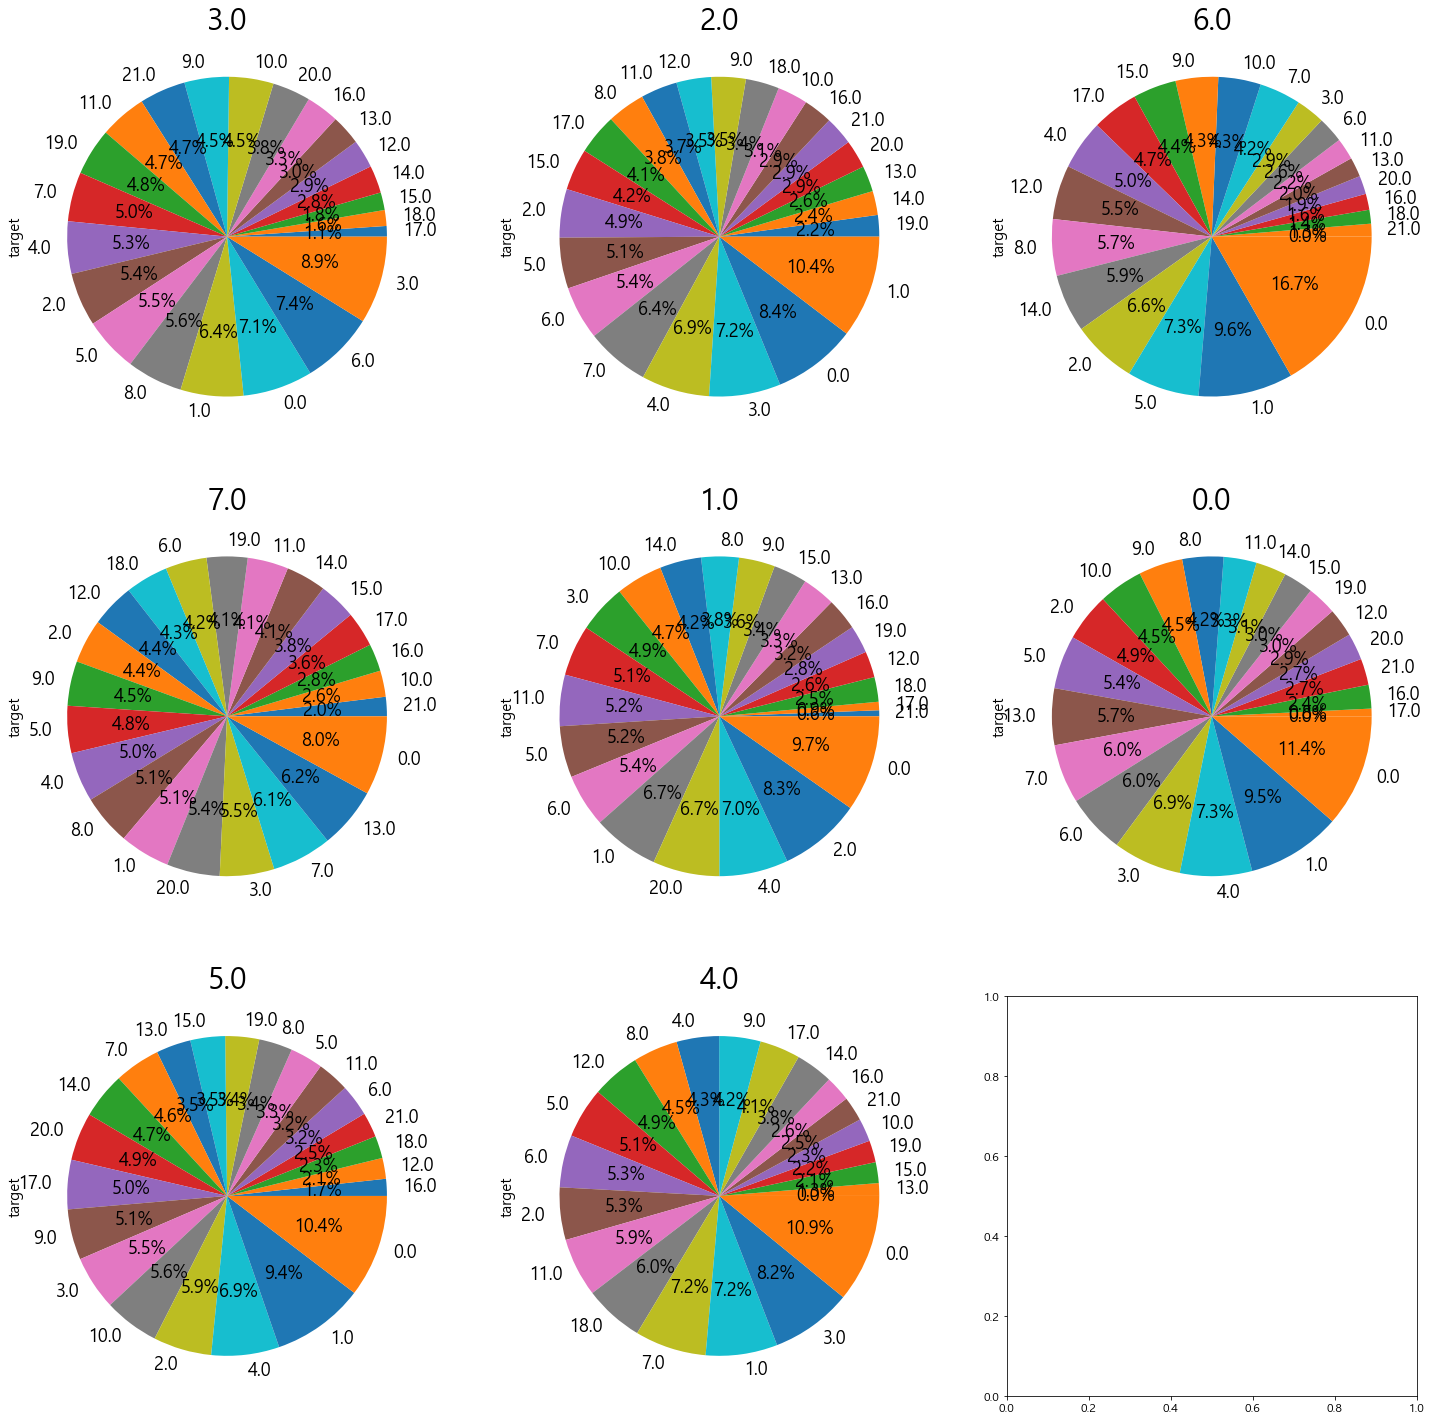

In [22]:
fig , ax = plt.subplots(3, 3, figsize=(25, 25))
axes = ax.flatten().tolist()

for i, v in enumerate(train['company_size'].unique()):
    df = train[train['company_size'] == v]
    df.groupby('experience')['target'].mean().sort_values().plot.pie(autopct='%.1f%%', fontsize=18, ax=axes[i])
    axes[i].set_title(v, fontsize=30)

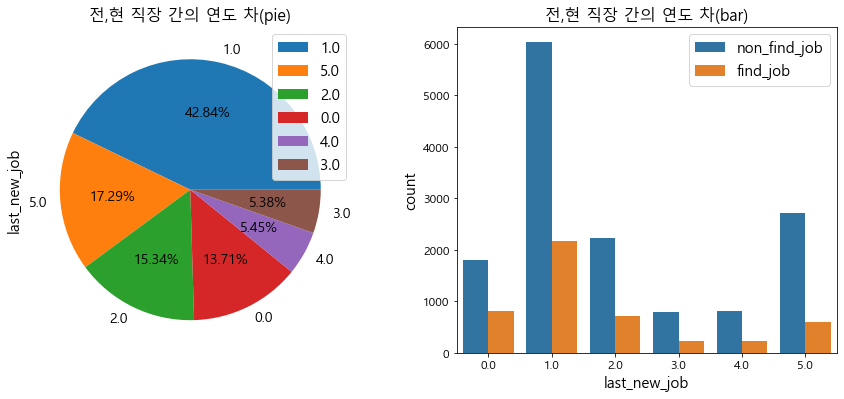

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

train['last_new_job'].value_counts().plot.pie(autopct='%.2f%%',
                                              fontsize=14, ax=axes[0])
axes[0].set_title('전,현 직장 간의 연도 차(pie)', fontsize=16)
axes[0].legend()

sns.countplot(x='last_new_job', hue='target', data=train, ax=axes[1])
axes[1].set_title('전,현 직장 간의 연도 차(bar)', fontsize=16)
axes[1].legend(['non_find_job', 'find_job'])

plt.show()

In [25]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_comer
0,8949,city_103,0.920,Male,Has relevent experience,0.0,Graduate,STEM,21.0,3.0,unknown,1.0,36,1.0,0
1,29725,city_40,0.776,Male,No relevent experience,0.0,Graduate,STEM,15.0,2.0,Pvt Ltd,5.0,47,0.0,0
2,11561,city_21,0.624,Male,No relevent experience,2.0,Graduate,STEM,5.0,6.0,unknown,0.0,83,0.0,0
3,33241,city_115,0.789,Male,No relevent experience,2.0,Graduate,Business Degree,0.0,7.0,Pvt Ltd,0.0,52,1.0,1
4,666,city_162,0.767,Male,Has relevent experience,0.0,Masters,STEM,21.0,2.0,Funded Startup,4.0,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,0.0,Graduate,Humanities,14.0,5.0,unknown,1.0,42,1.0,0
19154,31398,city_103,0.920,Male,Has relevent experience,0.0,Graduate,STEM,14.0,1.0,unknown,4.0,52,1.0,0
19155,24576,city_103,0.920,Male,Has relevent experience,0.0,Graduate,STEM,21.0,2.0,Pvt Ltd,4.0,44,0.0,0
19156,5756,city_65,0.802,Male,Has relevent experience,0.0,High School,STEM,0.0,4.0,Pvt Ltd,2.0,97,0.0,1
